   CRS_DEP_TIME CARRIER  DEP_TIME  ... DAY_OF_MONTH  TAIL_NUM Flight Status
0          1455      OH      1455  ...            1    N940CA        ontime
1          1640      DH      1640  ...            1    N405FJ        ontime
2          1245      DH      1245  ...            1    N695BR        ontime
3          1715      DH      1709  ...            1    N662BR        ontime
4          1039      DH      1035  ...            1    N698BR        ontime

[5 rows x 13 columns]
       CRS_DEP_TIME  DEP_TIME
count          2201      2201
mean           1372      1369
std             433       442
min             600        10
25%            1000      1004
50%            1455      1450
75%            1710      1709
max            2130      2330


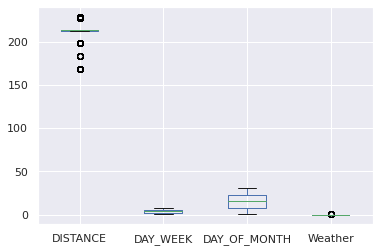

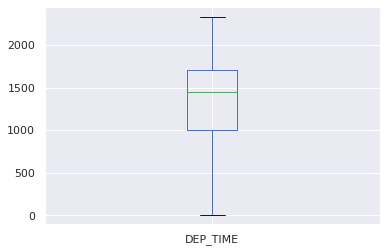

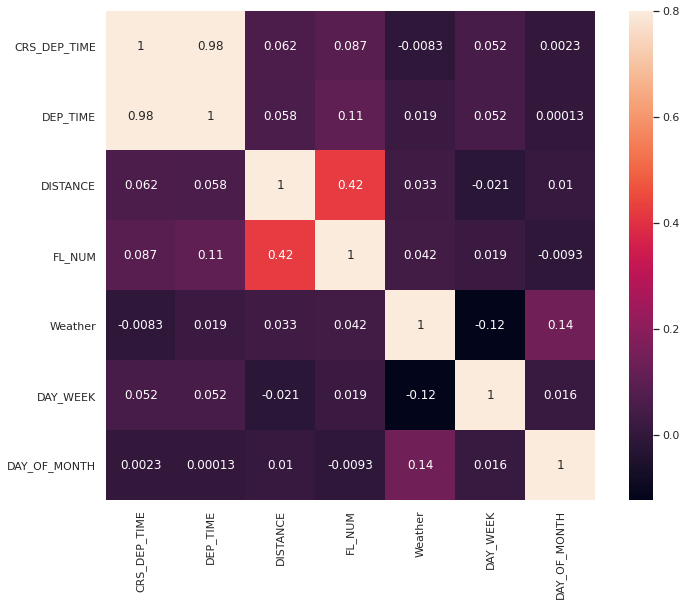

   CRS_DEP_TIME CARRIER  DEP_TIME  ... DAY_OF_MONTH  TAIL_NUM Flight Status
0          1455       5      1455  ...            1    N940CA             0
1          1640       2      1640  ...            1    N405FJ             0
2          1245       2      1245  ...            1    N695BR             0
3          1715       2      1709  ...            1    N662BR             0
4          1039       2      1035  ...            1    N698BR             0

[5 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


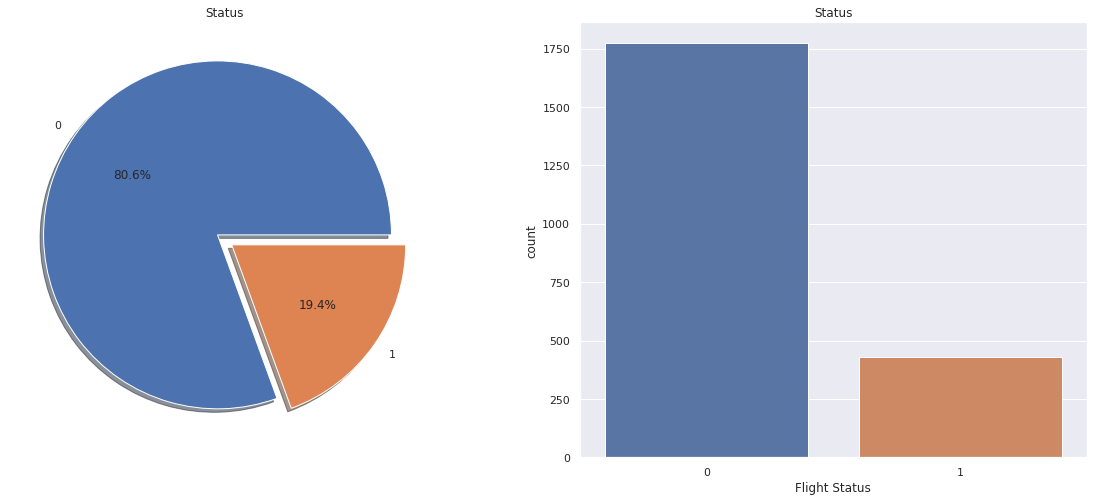

Status represents weather the flight was on time (0) or delayed (1) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


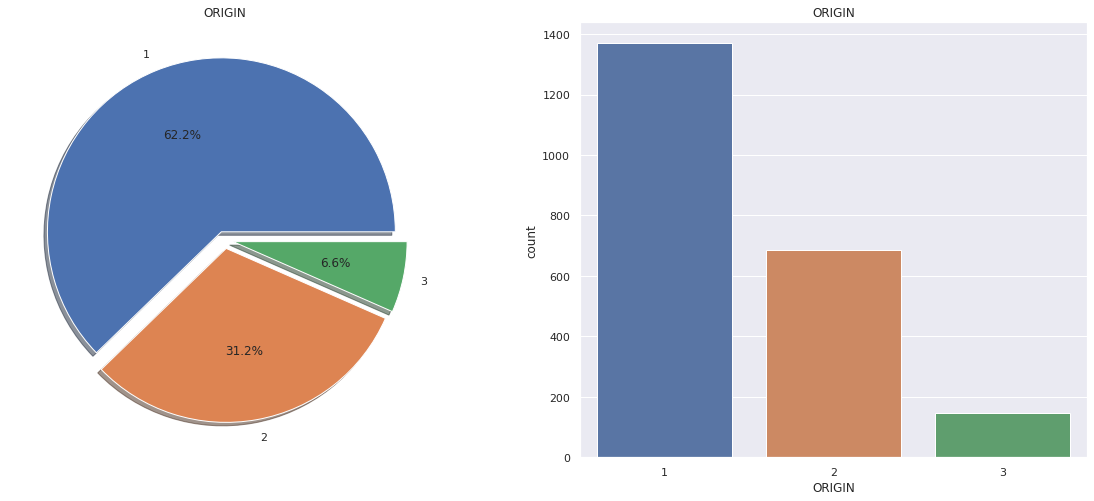

Percentage of flights from various origins: DCA(1), IAD(2), BWI(3) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


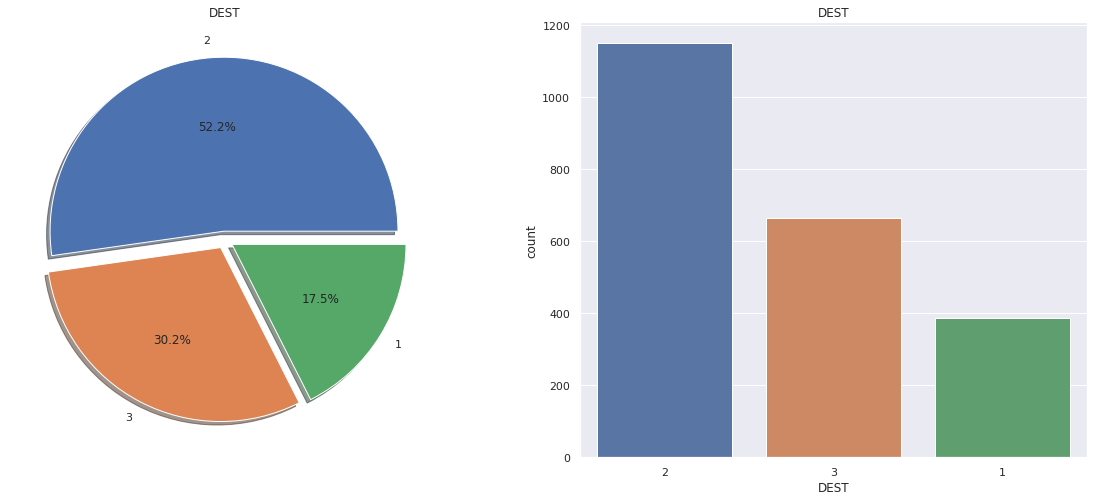

Percentage of flights with various destinations: JFK(1), LGA(2), EWR(3) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


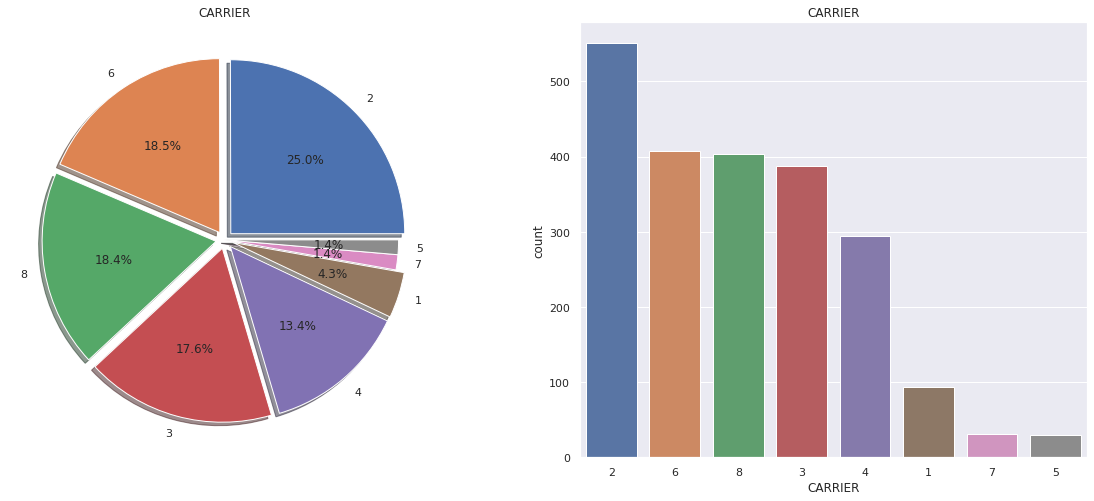

Percentage of flights with 8 different airline codes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


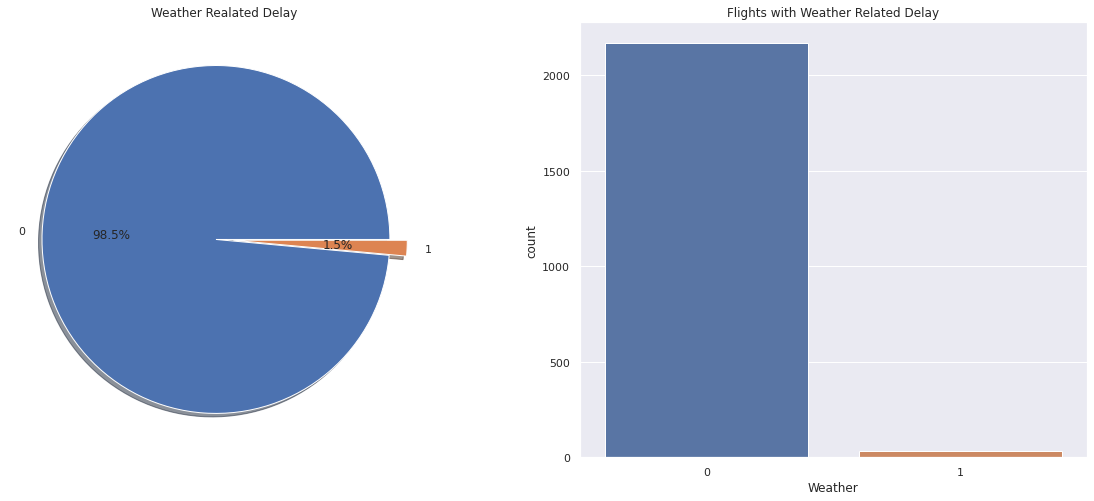

Percentage of flights with Weather related delay(1)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


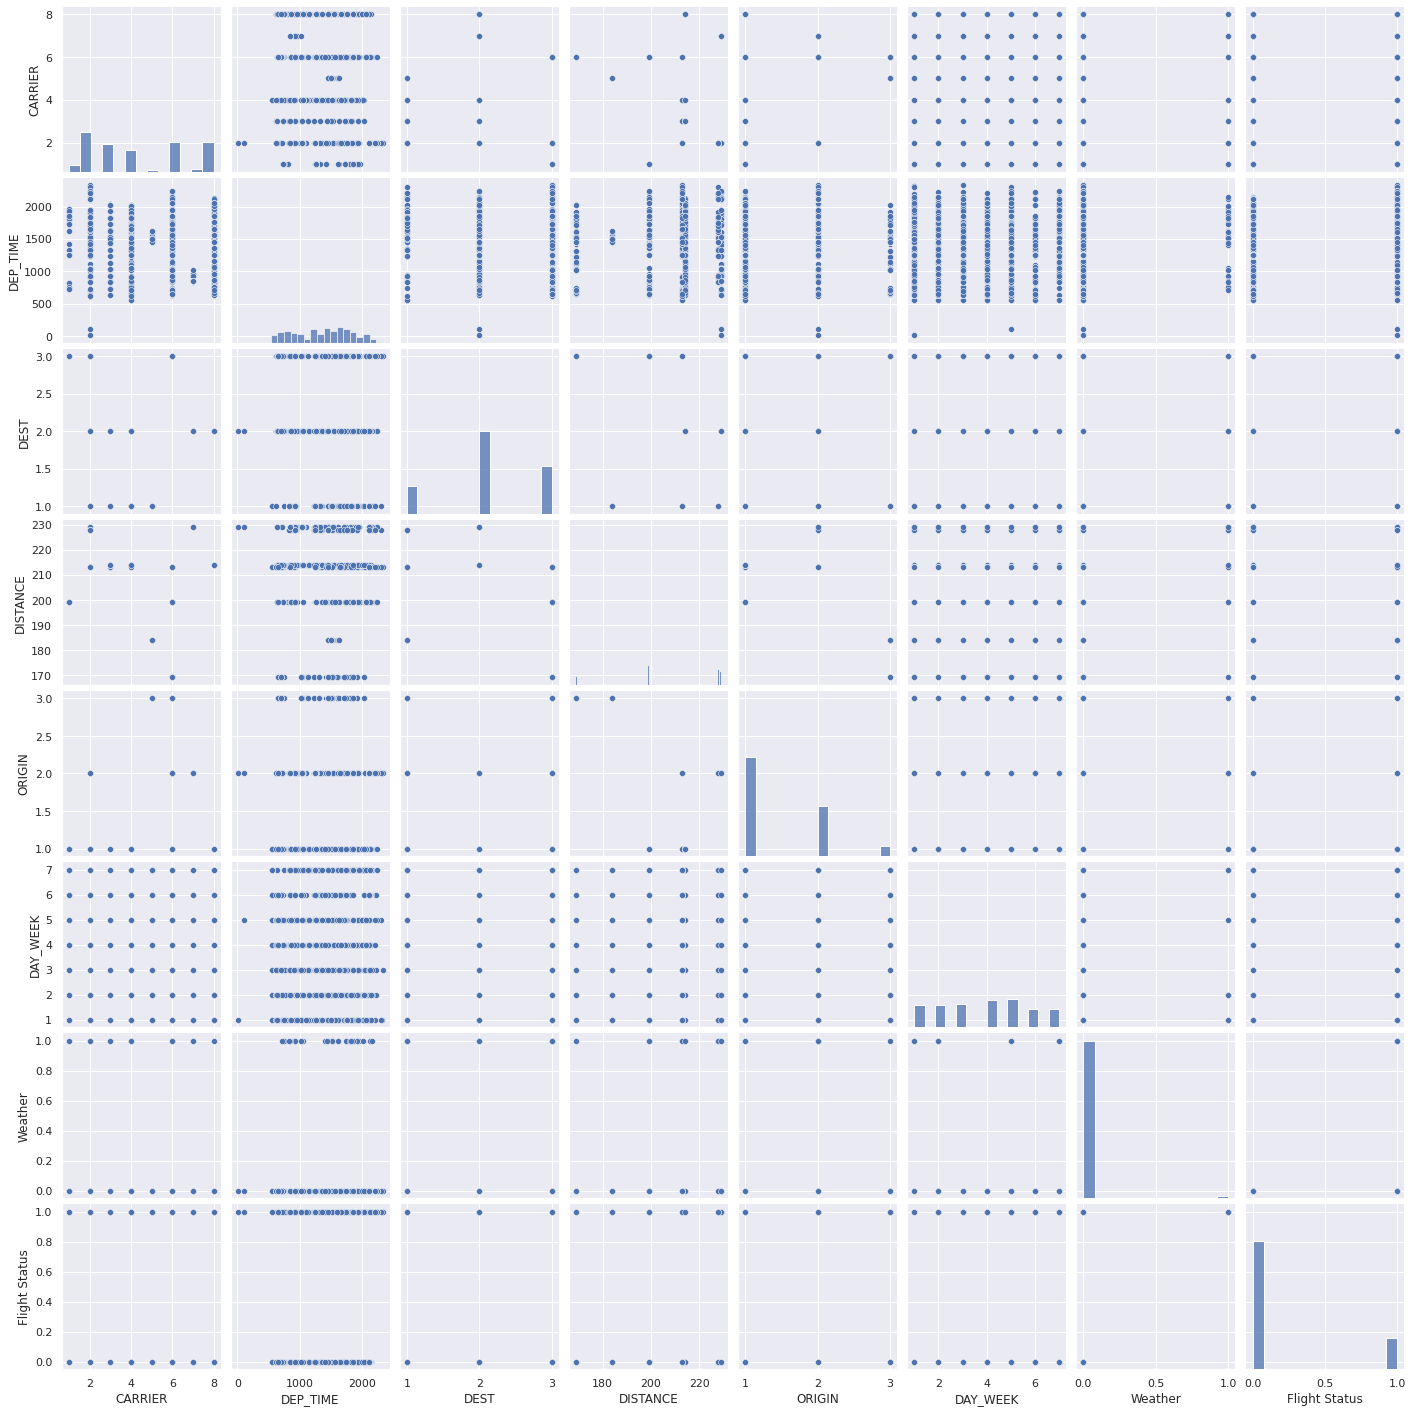

In [47]:
#Q1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format

#load the data
url = 'https://raw.githubusercontent.com/labdhigandhi/FlightDelays/main/FlightDelays.csv'
data = pd.read_csv(url)

#see the first five rows of data
print(data.head())

#numerical columns description
print(data[['CRS_DEP_TIME','CARRIER','DEP_TIME','TAIL_NUM','Flight Status']].describe())

data[['DISTANCE','DAY_WEEK','DAY_OF_MONTH','Weather']].plot.box()
data[['DEP_TIME']].plot.box()

#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);
plt.show()


data.loc[data['Flight Status'] == "ontime", 'Flight Status'] = 0
data.loc[data['Flight Status'] == "delayed", 'Flight Status'] = 1

data.loc[data['ORIGIN'] == "DCA", 'ORIGIN'] = 1
data.loc[data['ORIGIN'] == "IAD", 'ORIGIN'] = 2
data.loc[data['ORIGIN'] == "BWI", 'ORIGIN'] = 3

data.loc[data['DEST'] == "JFK", 'DEST'] = 1
data.loc[data['DEST'] == "LGA", 'DEST'] = 2
data.loc[data['DEST'] == "EWR", 'DEST'] = 3

data.loc[data['CARRIER'] == "CO", 'CARRIER'] = 1
data.loc[data['CARRIER'] == "DH", 'CARRIER'] = 2
data.loc[data['CARRIER'] == "DL", 'CARRIER'] = 3
data.loc[data['CARRIER'] == "MQ", 'CARRIER'] = 4
data.loc[data['CARRIER'] == "OH", 'CARRIER'] = 5
data.loc[data['CARRIER'] == "RU", 'CARRIER'] = 6
data.loc[data['CARRIER'] == "UA", 'CARRIER'] = 7
data.loc[data['CARRIER'] == "US", 'CARRIER'] = 8

print(data.head())

f,ax=plt.subplots(1,2,figsize=(20,8))
data['Flight Status'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Flight Status',order = data['Flight Status'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents weather the flight was on time (0) or delayed (1) ')

f,ax=plt.subplots(1,2,figsize=(20,8))
data['ORIGIN'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('ORIGIN')
ax[0].set_ylabel('')
sns.countplot('ORIGIN',order = data['ORIGIN'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('ORIGIN')
plt.show()

print('Percentage of flights from various origins: DCA(1), IAD(2), BWI(3) ')

f,ax=plt.subplots(1,2,figsize=(20,8))
data['DEST'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('DEST')
ax[0].set_ylabel('')
sns.countplot('DEST',order = data['DEST'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('DEST')
plt.show()

print('Percentage of flights with various destinations: JFK(1), LGA(2), EWR(3) ')

f,ax=plt.subplots(1,2,figsize=(20,8))
data['CARRIER'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05,0.05,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('CARRIER')
ax[0].set_ylabel('')
sns.countplot('CARRIER',order = data['CARRIER'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('CARRIER')
plt.show()

print('Percentage of flights with 8 different airline codes')

f,ax=plt.subplots(1,2,figsize=(20,8))
data['Weather'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Weather Realated Delay')
ax[0].set_ylabel('')
sns.countplot('Weather',order = data['Weather'].value_counts().index, data=data,ax=ax[1])
ax[1].set_title('Flights with Weather Related Delay')
plt.show()

print('Percentage of flights with Weather related delay(1)')

#scatterplot
sns.set()
cols = ['CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'ORIGIN', 'DAY_WEEK', 'Weather', 'Flight Status']
sns.pairplot(data[cols], size = 2.5)
plt.show()


Sample entries in the dataset:
    CRS_DEP_TIME CARRIER  DEP_TIME  ... DAY_WEEK  DAY_OF_MONTH  Flight Status
0           1455       5      1455  ...        4             1              0
1           1640       2      1640  ...        4             1              0
2           1245       2      1245  ...        4             1              0
3           1715       2      1709  ...        4             1              0
4           1039       2      1035  ...        4             1              0
5            840       2       839  ...        4             1              0
6           1240       2      1243  ...        4             1              0
7           1645       2      1644  ...        4             1              0
8           1715       2      1710  ...        4             1              0
9           2120       2      2129  ...        4             1              0
10          2120       2      2114  ...        4             1              0
11          1455       3      145

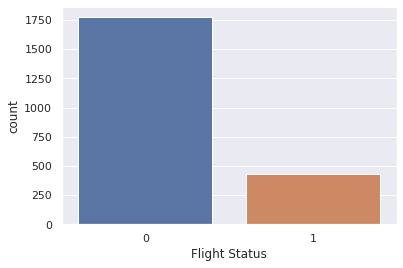

Shape of training dataset: (1320, 10)
Shape of test dataset: (881, 10)
Number of train samples:  1320
Number of test samples:  881
intercept: [-1.51203094]
coefficient: [-6.60867061  0.09889824  7.01327985  0.21289918  0.09024365  0.05221481
  0.11725835  0.72642048 -0.03897314  0.19262718]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       716
           1       1.00      0.39      0.56       165

    accuracy                           0.89       881
   macro avg       0.94      0.69      0.75       881
weighted avg       0.90      0.89      0.86       881

Accuracy: 0.8853575482406356
F1 score: 0.5589519650655022


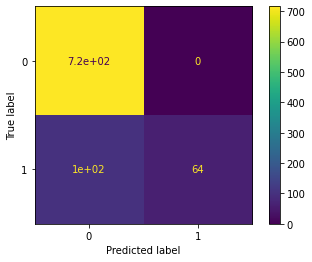

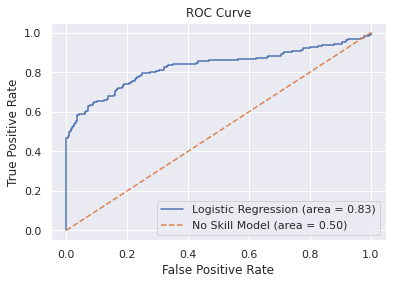

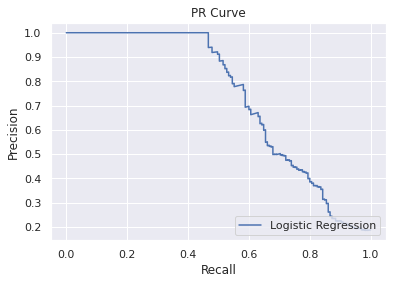

In [48]:
#Q2 and Q3

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, f1_score

#load the data
url = 'https://raw.githubusercontent.com/labdhigandhi/FlightDelays/main/FlightDelays.csv'
data = pd.read_csv(url)
data.loc[data['Flight Status'] == "ontime", 'Flight Status'] = 0
data.loc[data['Flight Status'] == "delayed", 'Flight Status'] = 1

data.loc[data['ORIGIN'] == "DCA", 'ORIGIN'] = 1
data.loc[data['ORIGIN'] == "IAD", 'ORIGIN'] = 2
data.loc[data['ORIGIN'] == "BWI", 'ORIGIN'] = 3

data.loc[data['DEST'] == "JFK", 'DEST'] = 1
data.loc[data['DEST'] == "LGA", 'DEST'] = 2
data.loc[data['DEST'] == "EWR", 'DEST'] = 3

data.loc[data['CARRIER'] == "CO", 'CARRIER'] = 1
data.loc[data['CARRIER'] == "DH", 'CARRIER'] = 2
data.loc[data['CARRIER'] == "DL", 'CARRIER'] = 3
data.loc[data['CARRIER'] == "MQ", 'CARRIER'] = 4
data.loc[data['CARRIER'] == "OH", 'CARRIER'] = 5
data.loc[data['CARRIER'] == "RU", 'CARRIER'] = 6
data.loc[data['CARRIER'] == "UA", 'CARRIER'] = 7
data.loc[data['CARRIER'] == "US", 'CARRIER'] = 8


data = data.drop(["FL_DATE", "TAIL_NUM"], axis=1)
print("Sample entries in the dataset:")
print(data.head(50))

data['Flight Status'].value_counts()

def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['Flight Status'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['Flight Status']).mean())

classwise_means(data)

sns.countplot(x='Flight Status', data=data)
plt.show()

#Train-Test split

# Following an 60-40 split on data.
# The dataset is shuffled with 99 as the random seed for reproducible results.
np_dataset = np.array(data)
X = np_dataset[:,:-1]
y = np_dataset[:,-1]
y=y.astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.40,random_state=99)
print("Shape of training dataset:",X_train.shape)
print("Shape of test dataset:",X_test.shape)
print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit model to training data
classifier = LogisticRegression(penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, y_train)

print('intercept:', classifier.intercept_)
print('coefficient:', classifier.coef_[0])
# Evaluate on test data 
y_pred = classifier.predict(X_test)

# Confusion Matrix
class_labels = data['Flight Status'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
# switch off Seaborn theme for CM plot
sns.reset_orig()
disp.plot()

# Performance Statistics
print(classification_report(y_test, y_pred))

#Evaluation on test data
#y_pred = ((X_test@w_old)>0.5).astype(int)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

# switch to default Seaborn theme
sns.set_theme()

def plot_curve(y1, x1, y2, x2, y_label,  x_label, y1_label, y2_label, title):
    """For plotting metrics of 2 models"""
    plt.figure()
    plt.plot(x1, y1, label=y1_label)
    if not (x2 is None or y2 is None or y2_label is None):
        plt.plot(x2, y2, label=y2_label, linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# ROC curve

# get probabilities of test sample being labelled as positive (1) from the LR model.
lr_probs = classifier.predict_proba(X_test)[:, 1]

# get roc curve vectors for plotting
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Compare with baseline 'No Skill' model which returns prob = 0 for all samples
ns_probs = [0.] * len(lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Area under ROC curve
lr_auc_roc = roc_auc_score(y_test, lr_probs)

# plot AUC
plot_curve(y1=tpr,
           x1=fpr,
           y2=ns_tpr,
           x2=ns_fpr,
           y_label='True Positive Rate',
           x_label='False Positive Rate',
           y1_label='Logistic Regression (area = %0.2f)' % lr_auc_roc,
           y2_label='No Skill Model (area = %0.2f)' % 0.5,
           title='ROC Curve')

# PR Curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

# plot PR curve
plot_curve(y1=lr_precision,
           x1=lr_recall,
           y2=None,
           x2=None,
           y_label='Precision',
           x_label='Recall',
           y1_label='Logistic Regression',
           y2_label=None,
           title='PR Curve')    


Sample entries in the dataset:
   CRS_DEP_TIME  DEP_TIME  Weather Flight Status
0          1455      1455        0             0
1          1640      1640        0             0
2          1245      1245        0             0
3          1715      1709        0             0
4          1039      1035        0             0
Classes in dataset: 
[0 1]


Class-wise Attribute Averages
               CRS_DEP_TIME  DEP_TIME  Weather
Flight Status                                 
0                      1348      1332        0
1                      1471      1522        0


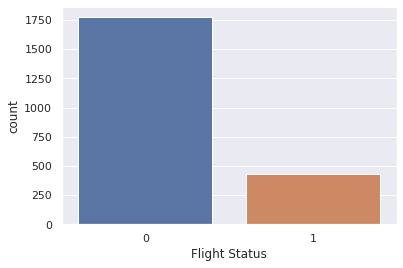

Shape of training dataset: (1760, 3)
Shape of test dataset: (441, 3)
Number of train samples:  1760
Number of test samples:  441
intercept: [-1.56349814]
coefficient: [-7.47575387  7.91025487  0.70296561]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       354
           1       1.00      0.39      0.56        87

    accuracy                           0.88       441
   macro avg       0.93      0.70      0.75       441
weighted avg       0.90      0.88      0.86       441

Accuracy: 0.8798185941043084
F1 score: 0.5619834710743802


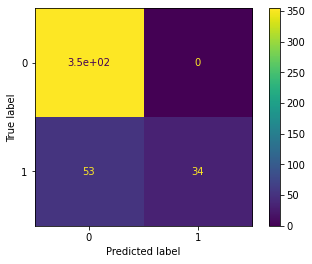

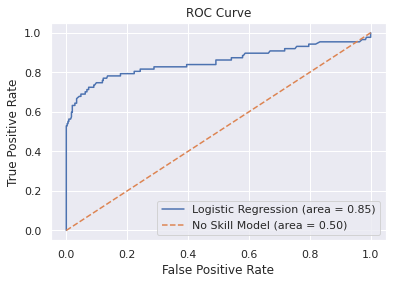

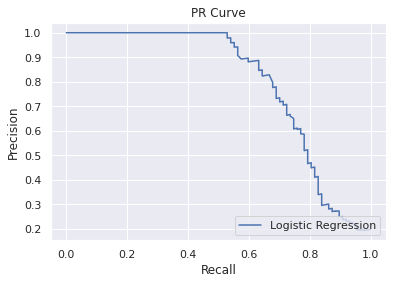

In [49]:
#Q4 and Q5

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve,accuracy_score,f1_score

#load the data
url = 'https://raw.githubusercontent.com/labdhigandhi/FlightDelays/main/FlightDelays.csv'
data = pd.read_csv(url)
data.loc[data['Flight Status'] == "ontime", 'Flight Status'] = 0
data.loc[data['Flight Status'] == "delayed", 'Flight Status'] = 1

data.loc[data['ORIGIN'] == "DCA", 'ORIGIN'] = 1
data.loc[data['ORIGIN'] == "IAD", 'ORIGIN'] = 2
data.loc[data['ORIGIN'] == "BWI", 'ORIGIN'] = 3

data.loc[data['DEST'] == "JFK", 'DEST'] = 1
data.loc[data['DEST'] == "LGA", 'DEST'] = 2
data.loc[data['DEST'] == "EWR", 'DEST'] = 3

data.loc[data['CARRIER'] == "CO", 'CARRIER'] = 1
data.loc[data['CARRIER'] == "DH", 'CARRIER'] = 2
data.loc[data['CARRIER'] == "DL", 'CARRIER'] = 3
data.loc[data['CARRIER'] == "MQ", 'CARRIER'] = 4
data.loc[data['CARRIER'] == "OH", 'CARRIER'] = 5
data.loc[data['CARRIER'] == "RU", 'CARRIER'] = 6
data.loc[data['CARRIER'] == "UA", 'CARRIER'] = 7
data.loc[data['CARRIER'] == "US", 'CARRIER'] = 8


data = data.drop(["FL_DATE", "TAIL_NUM","FL_NUM", "CARRIER", "DISTANCE", "ORIGIN", "DAY_WEEK", "DEST","DAY_OF_MONTH"], axis=1)
print("Sample entries in the dataset:")
print(data.head())

data['Flight Status'].value_counts()

def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['Flight Status'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['Flight Status']).mean())

classwise_means(data)

sns.countplot(x='Flight Status', data=data)
plt.show()

#Train-Test split

# Following an 60-40 split on data.
# The dataset is shuffled with 99 as the random seed for reproducible results.
np_dataset = np.array(data)
X = np_dataset[:,:-1]
y = np_dataset[:,-1]
y=y.astype('int')
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.20,random_state=99)
print("Shape of training dataset:",X_train.shape)
print("Shape of test dataset:",X_test.shape)
print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit model to training data
classifier = LogisticRegression(penalty='l2', tol=1e-6, max_iter=10000)
classifier.fit(X_train, y_train)

print('intercept:', classifier.intercept_)
print('coefficient:', classifier.coef_[0])
# Evaluate on test data 
y_pred = classifier.predict(X_test)

# Confusion Matrix
class_labels = data['Flight Status'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
# switch off Seaborn theme for CM plot
sns.reset_orig()
disp.plot()

# Performance Statistics
print(classification_report(y_test, y_pred))

#Evaluation on test data
#y_pred = ((X_test@w_old)>0.5).astype(int)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 score:",f1_score(y_test,y_pred))

# switch to default Seaborn theme
sns.set_theme()

def plot_curve(y1, x1, y2, x2, y_label,  x_label, y1_label, y2_label, title):
    """For plotting metrics of 2 models"""
    plt.figure()
    plt.plot(x1, y1, label=y1_label)
    if not (x2 is None or y2 is None or y2_label is None):
        plt.plot(x2, y2, label=y2_label, linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# ROC curve

# get probabilities of test sample being labelled as positive (1) from the LR model.
lr_probs = classifier.predict_proba(X_test)[:, 1]

# get roc curve vectors for plotting
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Compare with baseline 'No Skill' model which returns prob = 0 for all samples
ns_probs = [0.] * len(lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Area under ROC curve
lr_auc_roc = roc_auc_score(y_test, lr_probs)

# plot AUC
plot_curve(y1=tpr,
           x1=fpr,
           y2=ns_tpr,
           x2=ns_fpr,
           y_label='True Positive Rate',
           x_label='False Positive Rate',
           y1_label='Logistic Regression (area = %0.2f)' % lr_auc_roc,
           y2_label='No Skill Model (area = %0.2f)' % 0.5,
           title='ROC Curve')

# PR Curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

# plot PR curve
plot_curve(y1=lr_precision,
           x1=lr_recall,
           y2=None,
           x2=None,
           y_label='Precision',
           x_label='Recall',
           y1_label='Logistic Regression',
           y2_label=None,
           title='PR Curve')    

In [50]:
#Q6

#load the data
url = 'https://raw.githubusercontent.com/labdhigandhi/FlightDelays/main/FlightDelays.csv'
data = pd.read_csv(url)
data.loc[data['Flight Status'] == "ontime", 'Status'] = 0
data.loc[data['Flight Status'] == "delayed", 'Status'] = 1

data.loc[data['ORIGIN'] == "DCA", 'ORIGIN'] = 1
data.loc[data['ORIGIN'] == "IAD", 'ORIGIN'] = 2
data.loc[data['ORIGIN'] == "BWI", 'ORIGIN'] = 3

data.loc[data['DEST'] == "JFK", 'DEST'] = 1
data.loc[data['DEST'] == "LGA", 'DEST'] = 2
data.loc[data['DEST'] == "EWR", 'DEST'] = 3

data.loc[data['CARRIER'] == "CO", 'CARRIER'] = 1
data.loc[data['CARRIER'] == "DH", 'CARRIER'] = 2
data.loc[data['CARRIER'] == "DL", 'CARRIER'] = 3
data.loc[data['CARRIER'] == "MQ", 'CARRIER'] = 4
data.loc[data['CARRIER'] == "OH", 'CARRIER'] = 5
data.loc[data['CARRIER'] == "RU", 'CARRIER'] = 6
data.loc[data['CARRIER'] == "UA", 'CARRIER'] = 7
data.loc[data['CARRIER'] == "US", 'CARRIER'] = 8

data = data.drop(["TAIL_NUM","FL_NUM", "DISTANCE","Flight Status"], axis=1)
data = data.query('ORIGIN==1 & DEST==3 & Status==0')
data = data.drop(["ORIGIN","DEST", "Status"], axis=1)
print(data) 
print(data['DAY_OF_MONTH'].value_counts())
print(data['CARRIER'].value_counts())
print(data['Weather'].value_counts())

print("The ideal conditions for the highest chance of an ontime flight from DC to New York are: Date = 2/01/2004 and 9/01/2004 ; Carrier = 6 ; Weather = 0")

      CRS_DEP_TIME CARRIER  DEP_TIME  ... Weather  DAY_WEEK  DAY_OF_MONTH
36            1300       1      1256  ...       0         4             1
37            1730       1      1726  ...       0         4             1
44            1525       6      1521  ...       0         4             1
45            1900       6      1855  ...       0         4             1
46            1400       6      1357  ...       0         4             1
...            ...     ...       ...  ...     ...       ...           ...
2194           930       6       925  ...       0         6            31
2196           645       6       644  ...       0         6            31
2198          1600       6      1558  ...       0         6            31
2199          1359       6      1403  ...       0         6            31
2200          1730       6      1736  ...       0         6            31

[202 rows x 7 columns]
2     10
9     10
22     9
12     9
14     9
19     9
8      9
20     9
30     8
13     